In [1]:
from ga.ga_hlm import *
from hlm_basic.ssn import GenerateNetwork, UpstreamArea
from hlm_basic.watershed import Watershed
from hlm_basic.tools import GetForcing, Set_InitialConditions, plot_sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
l_id, connectivity, h_order, nextlink = GenerateNetwork(5)
n_hills = len(connectivity)
a_hill = 0.5 * 0.5 #km2
A_h = np.array([a_hill*10**6 for i in range(n_hills)]) #m2
L_i = np.array([0.5*10**3 for i in range(n_hills)])  #m
A_i = UpstreamArea(a_hill, connectivity, h_order) #km2

In [3]:
forcing, raw_data = GetForcing("../data/rainfall/2010_timeseries.csv", '2010-06-01','2010-08-01')
te = len(forcing)-1
q, s_p, s_t, s_s = Set_InitialConditions(0.5, A_i[0], A_i)

In [17]:
dams = [9,27,36,45,63,90,108,117,126,135,144,153,171,189,198,207,216,225,234] 
n_dams = len(dams)

In [5]:
SSN1 = Watershed(Model=254)
SSN1.init_custom(links=l_id, connectivity=connectivity, A_i=A_i, L_i=L_i, A_h=A_h)
SSN1.initialize(q=q, s_p=s_p, s_t=s_t, s_s=s_s)
dc_nodam = SSN1.Run_254( [0, te-1],forcing, rtol=1e-4, t_eval=np.arange(0,te,5))

Model 254 is being used!
87839

In [18]:
SSN2 = Watershed(Model=255)
SSN2.init_custom(links=l_id, connectivity=connectivity, A_i=A_i, L_i=L_i, A_h=A_h)
SSN2.dam_ids = dams
SSN2.set_dam_state(states=[1 for _ in range(n_dams)])
dam_params = [4.5, 5, 200000, 0.5, 0.75, 0.6, 1.66, 1, 10]
q, s_p, s_t, s_s = Set_InitialConditions(0.5, A_i[0], A_i)
S = [100000 for _ in range(n_dams)]
SSN2.initialize(q=q, S = S, s_t =s_t, s_p =s_p, s_s=s_s)

dc_passive, st_passive = SSN2.Run_255( [0, te], forcing, dam_params, method='DOP853')

Model 255 (254 with_dams) is being used!
87816

In [13]:
SSN3 = Watershed(Model=255)
SSN3.init_custom(links=l_id, connectivity=connectivity, A_i=A_i, L_i=L_i, A_h=A_h)
SSN3.dam_ids = dams
q, s_p, s_t, s_s = Set_InitialConditions(0.5, A_i[0], A_i)
S = [100000 for _ in range(n_dams)]

update = 15 #mins
t0 = 0

columns = SSN3.__columns__()
dc_random = pd.DataFrame(columns =columns[0])
st_random  = pd.DataFrame(columns =columns[1])
while t0 < te:
    if t0 !=0:
        q, S, s_p, s_t, s_s = SSN3.Get_Snapshot()
    # states = np.random.randint(2, size=len(SSN3.dam_ids)).tolist()
    states = [1 for _ in range(n_dams)]
    print(t0, ' >>> ', states)
    SSN3.set_dam_state(states=states)
    SSN3.initialize(q=q, S=S, s_p=s_p,s_t =s_t, s_s=s_s)
    dc, st = SSN3.Run_255([t0, t0+update], forcing, dam_params, method='DOP853')
    t0 += update
    dc_random = dc_random.append(dc)
    st_random = st_random.append(st)

 1, 1, 1, 1, 1, 1, 1, 1, 1]
83550  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83565  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83580  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83595  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83610  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83625  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83640  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8365483655  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83670  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83685  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83700  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83715  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83730  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83745  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

IndexError: list index out of range

In [22]:
def RandomStrategy(id_agents, n_strategy, n_memory):
    '''Returns a dictionary consisting of dam Ids and the weights assigned.'''
    strategies = {}
    for i in id_agents:
        strategies[i] = np.random.uniform(low =-1.0,high = 1.0, size=(n_strategy, n_memory+1))
    return strategies

def PredictFlow(strategy, subhistory):
    predicted_flow = strategy[0] + np.sum(strategy[1:] * subhistory)    
    return predicted_flow

def UpdateStrategy(agent, memory_size, history, strategies):
    scores = np.array([])
    for strategy in strategies:
        score = 0
        for past in range(memory_size):
            subhistory = history[past:memory_size+past]
            prediction = PredictFlow(strategy, subhistory)
            score = score + abs(history[memory_size+past] - prediction)
        scores =np.append(scores,score)
    best_idx = np.argmin(scores)
    return best_idx

def MakeDecision(agent, memory_size, history, strategies, threshold)  :
    best_strategy = UpdateStrategy(agent, memory_size, history, strategies[agent])
    prediction = PredictFlow(strategies[agent][best_strategy], history[-memory_size:])
#     global test1, test2
#     if agent ==1:
#         test1.append(prediction)
#     if agent ==61:
#         test2.append(prediction)
    if prediction <= threshold:
        return 1
    else:
        return 0


In [49]:
SSN4 = Watershed(Model=255)
SSN4.init_custom(links=l_id, connectivity=connectivity, A_i=A_i, L_i=L_i, A_h=A_h)
SSN4.dam_ids = dams
dam_params = [4.5, 5, 200000, 0.5, 0.75, 0.6, 1.66, 1, 10]
q, s_p, s_t, s_s = Set_InitialConditions(0.5, A_i[0], A_i)
S = [100000 for _ in range(n_dams)]

a_dams = [9, 27, 36, 45, 63]
b_dams = [90,108,117,126,135,144,153]
c_dams = [171,189,198,207,216,225,234]

memory_size = 20
number_strategies = 10
strategies = RandomStrategy(dams, number_strategies, memory_size)

columns = SSN4.__columns__()
dc_elfarol = pd.DataFrame(columns =columns[0])
st_elfarol  = pd.DataFrame(columns =columns[1])
flow_outlet = []
flow_81 = []
flow_162 = []
states_all = []

update = 15 #mins
t0 = 0
memory=0

while t0 < te:
    if t0 !=0:
        q, S, s_p, s_t, s_s = SSN4.Get_Snapshot()
    if memory <= 2*memory_size:
        states =[1 for _ in range(n_dams)]

    elif memory > 2*memory_size: 
        history_outlet = flow_outlet[-2*memory_size:]
        history_81 = flow_81[-2*memory_size:]
        history_162 = flow_162[-2*memory_size:]
        states = []
        for agent in dams:
            if agent in a_dams:
                state = MakeDecision(agent, memory_size, history_outlet, strategies, 33)
            elif agent in b_dams:
                state = MakeDecision(agent, memory_size, history_81, strategies, 17)
            elif agent in c_dams:
                state = MakeDecision(agent, memory_size, history_162, strategies, 17)
            states += [state]
    states_all.append((t0, states))
    print(t0, ' >>> ',states)
    SSN4.dam_loc_state(states=states)
    SSN4.initialize(q=q, S=S, s_p=s_p,s_t =s_t, s_s=s_s)
    try:
        dc, st = SSN4.Run_255([t0, t0+update-1], forcing, dam_params,rtol=1e-4,t_eval = np.arange(t0, t0+update, 5))
    except IndexError:
        break
    dc_elfarol = dc_elfarol.append(dc)
    st_elfarol = st_elfarol.append(st)
    flow_outlet += [dc['0'].iloc[-1]]
    flow_81 += [dc['81'].iloc[-1]]
    flow_162 += [dc['162'].iloc[-1]]
    t0 += update
    memory +=1

1, 1, 1, 1, 1, 1, 1, 1, 1]
83685  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8369983700  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83715  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8372983730  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83745  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8375983760  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83775  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83790  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8380483805  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83820  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8383483835  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83850  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8386483865  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
83880  >>>  [1, 1, 1, 1, 1, 1, 1,

In [67]:
def FitnessCalculator(sim_data):
    '''Calculates fitness of the individuals'''
    fitnesses = np.array([])
    for data in sim_data:
        fitness = 0
        flow = data[0]
        storage = data[1]
        dam_over = (storage>=200000).values.sum()
        # fitness += -0.0454*flow['0']**2 + 1.905*flow['0'] - 10
        # fitness += -0.1653*flow['81']**2 + 3.633 * flow['81'] -10 
        # fitness += -0.1653*flow['162']**2 + 3.633 * flow['162'] -10 
        # fitness += sum(-(1e-5)*storage[dam4].values + 10)
        fitness += 100/flow['0']
        fitness -= dam_over*100
        fitnesses = np.append(fitnesses, fitness)

    return fitnesses

In [70]:
def RunSimulation(object, state , t0, forcing):
    dam_params = [4.5, 5, 200000, 0.5, 0.75, 0.6, 1.66, 1, 10]
    object.dam_loc_state(states=state)
    dc_test, st_test = object.Run_255( [t0, t0+300-1], forcing, dam_params,rtol=1e-4)
    flow_max = dc_test.max(axis=0)
    volume_max = st_test.max(axis=0)
    return [flow_max, volume_max]#, [dc_test, st_test]

In [71]:
SSN5 = Watershed(Model=255)
SSN5.init_custom(links=l_id, connectivity=connectivity, A_i=A_i, L_i=L_i, A_h=A_h)
SSN5.dam_ids = dams
dam_params = [4.5, 5, 200000, 0.5, 0.75, 0.6, 1.66, 1, 10]
q, s_p, s_t, s_s = Set_InitialConditions(0.5, A_i[0], A_i)
S = [100000 for _ in range(n_dams)]

Model 255 (254 with_dams) is being used!


In [72]:
update = 180 #mins
t0 = 0
fitness_overtime = []
columns = SSN5.__columns__()
dc_ga = pd.DataFrame(columns =columns[0])
st_ga  = pd.DataFrame(columns =columns[1])
while t0 < te-300:
    if t0 !=0:
        q, S, s_p, s_t, s_s = SSN5.Get_Snapshot()
    

    # if t0==4200:
    population = InitialPopulation(10, n_dams)
    SSN5.initialize(q=q, S=S, s_p=s_p,s_t =s_t, s_s=s_s)
    data = RunSimulation(SSN5, population[0] , t0, forcing)
    flow = data[0]
    if flow['0']>21: #or flow['81']>15 or flow['162']>15:
        # state = [0 for _ in range(n_dams)]

        generation = 0
        # sim_results = []
        while generation<10: # generation
            sim_data = []
            
            for state in population:
                sim= RunSimulation(SSN5, state , t0, forcing)
                sim_data.append(sim)
                # sim_results.append((state,sim_result))
            fitnesses = FitnessCalculator(sim_data)

            idx = np.argmax(fitnesses)
            fitness_overtime.append(fitnesses[idx])
            # if  fitnesses[idx]>9: 
            #     # print(fitnesses[idx]) 
            #     break
            parents = MatingPoolSelection(population, fitnesses, n_parents=None, selection='best', k=3)
            offsprings = Crossover(parents, operator='uniform')
            offsprings = MutateOffspring(offsprings, method='inversion', p=0.1)
            population = NewPopulation(parents, offsprings)
            generation +=1
        state = population[idx].astype(int).tolist()
        print(t0, ' >>> ', state, 'fitness>>', fitnesses[idx])
    else:
        state = [1 for _ in range(n_dams)]

        print(t0, ' >>> ', state, )
    SSN5.dam_loc_state(states=state)
    dc, st = SSN5.Run_255([t0, t0+update-1], forcing, dam_params,rtol=1e-4,t_eval = np.arange(t0, t0+update, 5))
    t0 += update
    dc_ga = dc_ga.append(dc)
    st_ga = st_ga.append(st)

1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
39060  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
39240  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
39420  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
39600  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
39780  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
39960  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
40140  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
40320  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
40500  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
40680  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
40860  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
41040  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
41220  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
41400  >>>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
a_dams = [9, 27, 36, 45, 63]
b_dams = [90,108,117,126,135,144,153]
c_dams = [171,189,198,207,216,225,234]

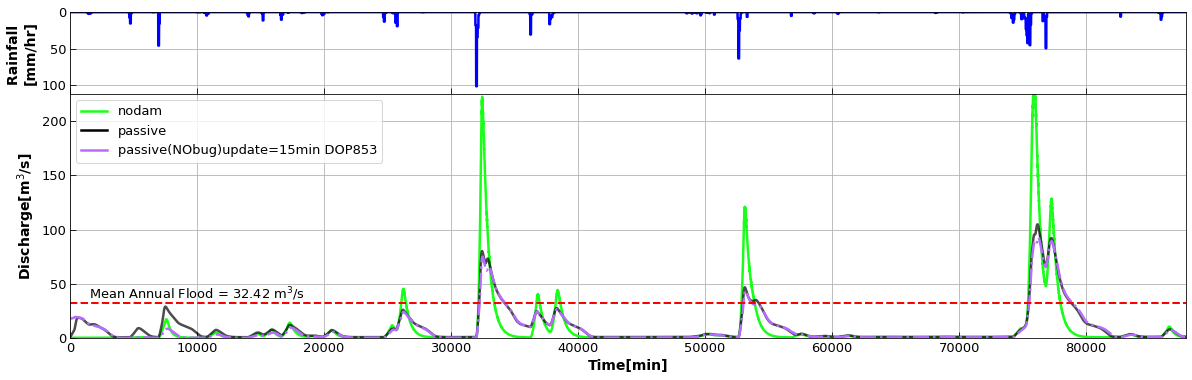

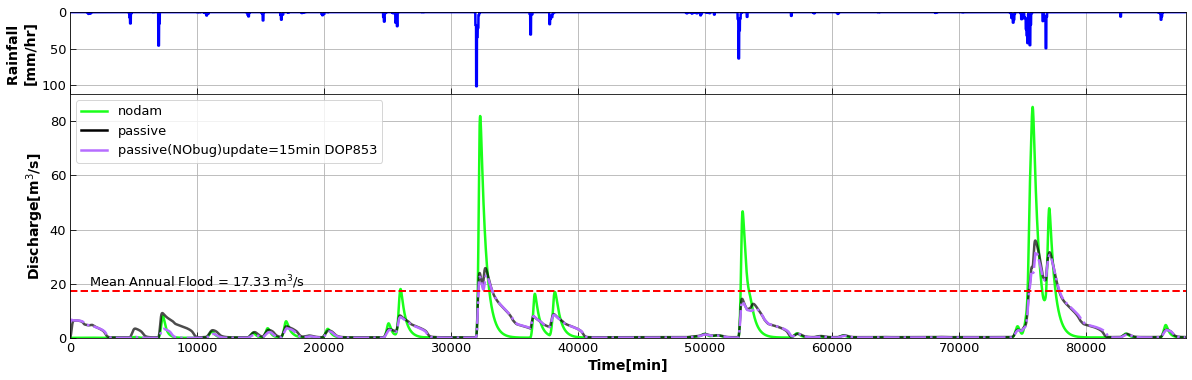

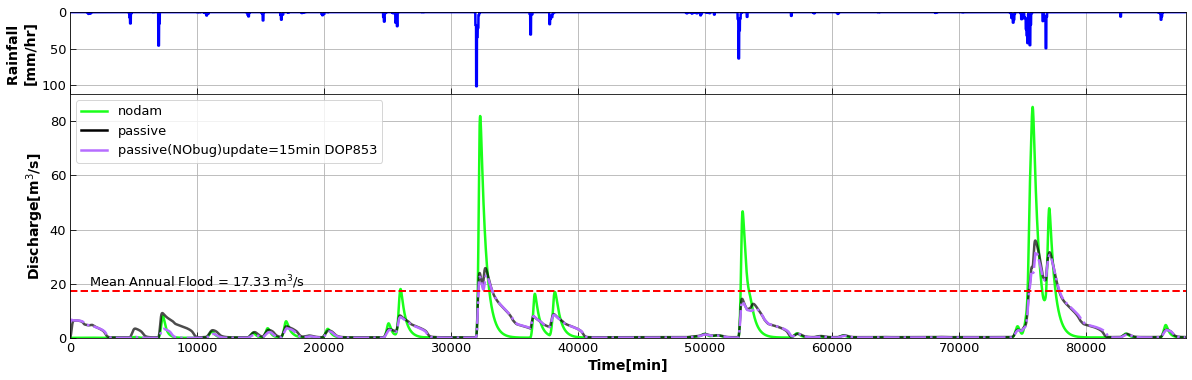

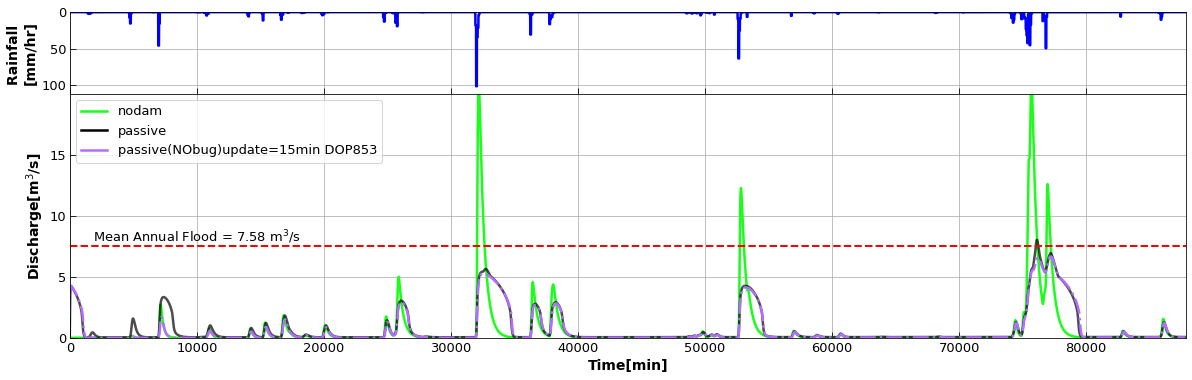

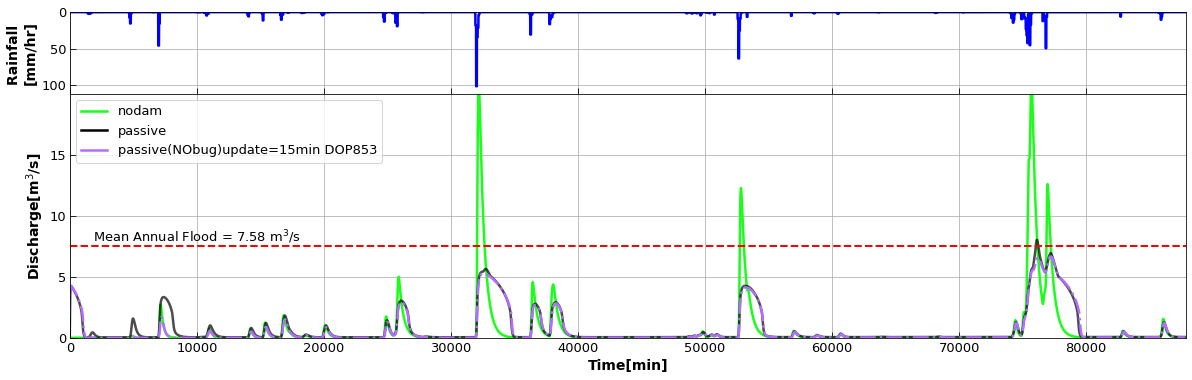

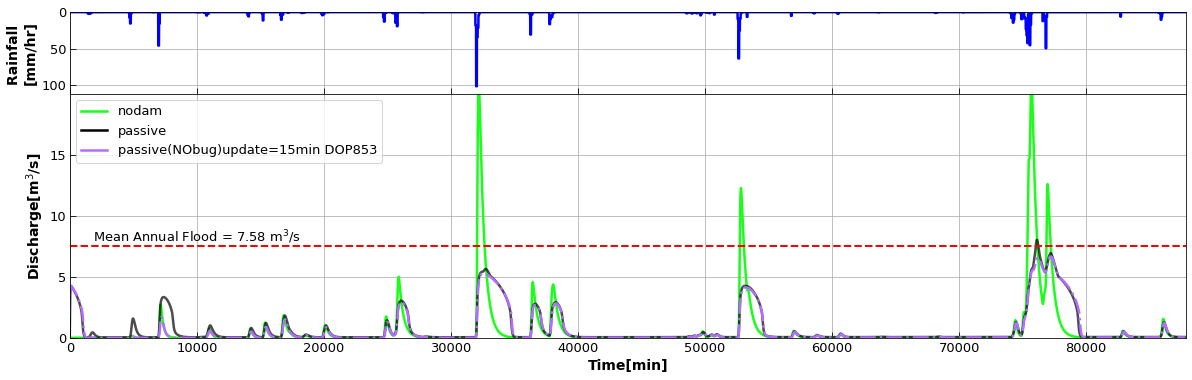

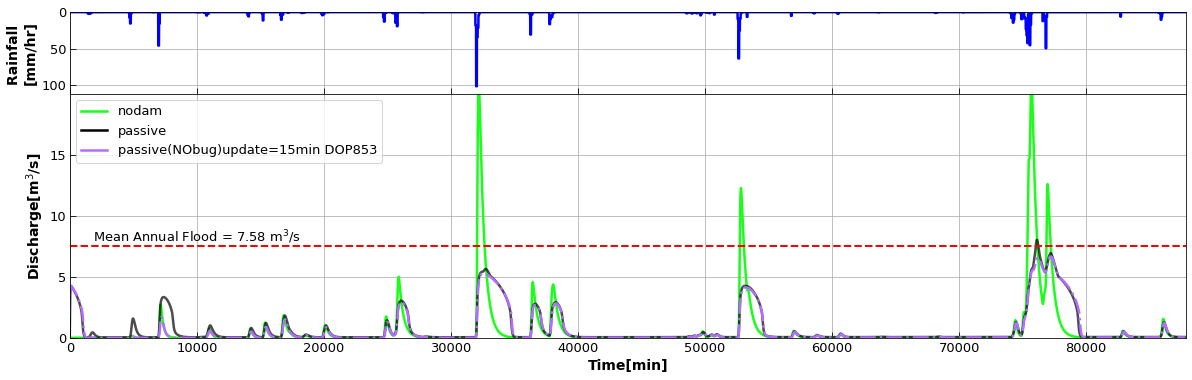

In [20]:
s_name = '_statechangeWITHOUBUG_Solver_DOP853' 
pltkwargs = np.array([{'label':'nodam', 'color':'#1AFF1A'}, {'label':'passive', 'color':'#000000','alpha':0.7}, {'label':'passive(NObug)update=15min DOP853', 'color':'#b66dff','alpha':1, 'linestyle':'dashdot'},{'label':'elfarol', 'color':'magenta', 'alpha':0.9},  {'label':'GA', 'color':'#924900','alpha':0.8},{'label':'extra', 'color':'#490092'}])
pltKwargs = pltkwargs[[0,1,2]]
dataset = [dc_nodam,dc_passive, dc_random]
plot_sim(0, forcing, dataset, pltKwargs, d_type='discharge', discharge_axis=[0,225,50], area=60.75, save='../../Supp_DamStudy/Hydro0'+s_name)
plot_sim(81, forcing, dataset, pltKwargs, d_type='discharge', discharge_axis=[0,90,20], area=20.25, save='../../Supp_DamStudy/Hydro81'+s_name)
plot_sim(162, forcing, dataset, pltKwargs, d_type='discharge', discharge_axis=[0,90,20], area=20.25, save='../../Supp_DamStudy/Hydro162'+s_name)
plot_sim(35, forcing, dataset, pltKwargs, d_type='discharge', discharge_axis=[0,20,5], area=4.75,save='../../Supp_DamStudy/Hydro35'+s_name)
plot_sim(197, forcing, dataset, pltKwargs, d_type='discharge', discharge_axis=[0,20,5], area=4.75, save='../../Supp_DamStudy/Hydro197'+s_name)
plot_sim(224, forcing, dataset, pltKwargs, d_type='discharge', discharge_axis=[0,20,5], area=4.75, save='../../Supp_DamStudy/Hydro224'+s_name)
plot_sim(143, forcing, dataset, pltKwargs, d_type='discharge', discharge_axis=[0,20,5], area=4.75, save='../../Supp_DamStudy/Hydro143'+s_name)


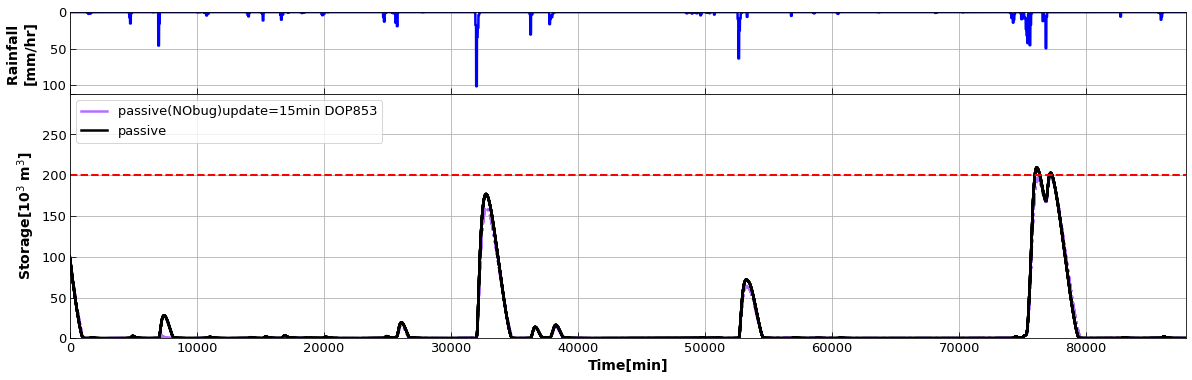

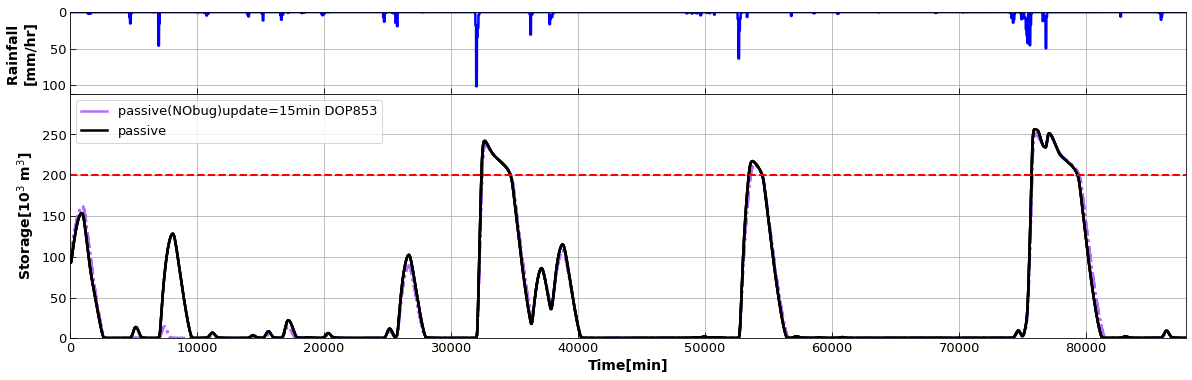

In [21]:
order_3 = [9,36,45,63,90,117,126,144,153,171,198,207,225,234] 
order_4 = [27, 189, 216, 135, 108]
pltKwargs = pltkwargs[[2,1]]
dataset = [st_random,st_passive]
plot_sim(order_3, forcing, dataset, pltKwargs, d_type='storage', save='../../Supp_DamStudy/Order3_'+s_name)
plot_sim(order_4, forcing, dataset, pltKwargs, d_type='storage',save='../../Supp_DamStudy/Order4_'+s_name)

In [82]:

from imp import reload 
import hlm_basic
reload(hlm_basic.tools)
from hlm_basic.tools import plot_sim